<a href="https://colab.research.google.com/github/Jiablero/notebooks/blob/master/stepik_random_forest_practic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [0]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [4]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,1,2,2,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,0,1,3,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,1,1,1,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,0,1,2,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,1,2,2,3,6,0,2,1,4,2,5,0,0


https://stepik.org/lesson/209697/step/3?unit=183201


In [0]:
X = data.drop(['class'], axis = 1)
y = data['class']

In [0]:
rf_clf = RandomForestClassifier(random_state=0)

In [0]:
parameters = {
    'n_estimators': range(10, 50, 10), 
    'max_depth': range(1, 12, 2), 
    'min_samples_leaf': range(1, 7), 
    'min_samples_split': range(2, 9, 2)}

In [0]:
gs_clf = GridSearchCV(rf_clf, parameters, cv = 3, n_jobs=-1)

In [12]:
gs_clf.fit(X, y)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [13]:
gs_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

https://stepik.org/lesson/209697/step/4?unit=183201

In [0]:
best_features = pd.DataFrame({'feature': list(X), 'value': gs_clf.best_estimator_.feature_importances_})

In [27]:
best_features.sort_values('value', ascending=False)

,feature,value
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


https://stepik.org/lesson/209697/step/5?unit=183201

In [0]:
test_X = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [29]:
test_X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3,8,1,3,1,0,0,4,0,2,2,2,7,7,0,2,1,4,2,3,3
1,5,3,4,1,5,1,0,0,10,1,1,2,2,6,6,0,2,1,4,3,5,0
2,3,3,4,0,8,1,0,1,0,1,0,2,2,7,6,0,2,1,0,7,4,4
3,3,2,2,0,7,1,0,1,0,1,0,2,1,6,7,0,2,1,0,7,4,0
4,3,2,2,0,8,1,0,1,0,1,0,2,1,6,6,0,2,1,0,7,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3,3,2,0,2,1,0,1,0,1,0,2,1,7,7,0,2,1,0,7,4,2
2027,5,2,8,1,0,1,0,0,10,0,2,2,2,7,7,0,2,1,4,2,2,1
2028,5,3,3,0,2,1,0,0,3,0,1,1,1,6,0,0,2,1,2,1,4,4
2029,5,3,3,1,5,1,0,0,9,1,1,2,2,3,3,0,2,1,4,3,4,0


In [0]:
best_clf = gs_clf.best_estimator_

In [0]:
predictions = best_clf.predict(test_X)

In [36]:
len(predictions[predictions == 1])

976

https://stepik.org/lesson/209697/step/6?unit=183201


In [0]:
test_y = pd.read_csv('testing_y_mush.csv')

In [0]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [48]:
test_y['predicted_class'] = predictions
test_y.head()

,class,predicted_class
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1


In [49]:
confusion_matrix(test_y['class'], test_y.predicted_class)

array([[1055,    0],
       [   0,  976]])

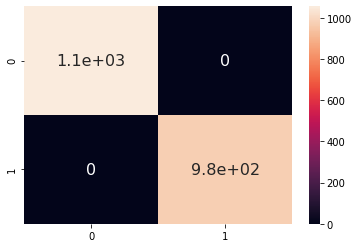

In [50]:
sns.heatmap(confusion_matrix(test_y['class'], test_y.predicted_class), annot=True,annot_kws={"size": 16})

https://stepik.org/lesson/209697/step/7?unit=183201

In [0]:
assault = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')

In [52]:
assault.head()

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806


In [0]:
X_train = assault.drop(['class'], axis = 1)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(assault['class'])
y_train = le.transform(assault['class'])

In [0]:
ass_clf = RandomForestClassifier(random_state=0)
parameters = {
    'n_estimators': range(10, 50, 10), 
    'max_depth': range(1, 12, 2), 
    'min_samples_leaf': range(1, 7), 
    'min_samples_split': range(2, 9, 2)}

gs_ass_clf = GridSearchCV(ass_clf, parameters, cv = 3, n_jobs=-1)

In [60]:
gs_ass_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [0]:
best_ass = gs_ass_clf.best_estimator_

In [0]:
ass_newdata = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [0]:
operative_info = best_ass.predict(ass_newdata)

In [0]:
operative_info = le.inverse_transform(operative_info)

In [73]:
pd.Series(operative_info).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

https://stepik.org/lesson/209697/step/8?unit=183201

In [0]:
ass_features = pd.DataFrame({'feature': list(ass_newdata), 'value': best_ass.feature_importances_})

In [75]:
ass_features.sort_values('value', ascending=False)

,feature,value
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


https://stepik.org/lesson/209697/step/9?unit=183201

In [0]:
space_regions_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [78]:
space_regions_data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [79]:
space_regions_data.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000
